# Game of Thrones - Group 9 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

In [2]:
df_deaths = pd.read_csv("character-deaths.csv", header=0)
df_predictions = pd.read_csv("character-predictions.csv", header=0)
df_battles = pd.read_csv("battles.csv", header=0)

In [3]:
df_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


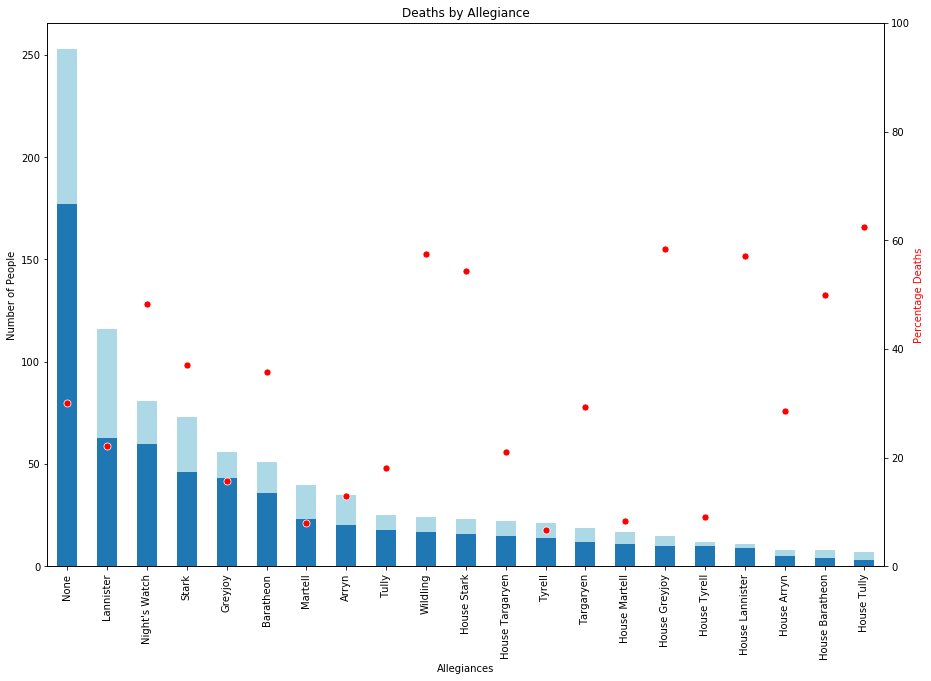

In [4]:
# we want to know how many people of which allegiance died troughtout the whole series and how much that is in percentage
# for that we only need the Allegiance names and the death years, to know whether they died or not

allegiances = df_deaths[["Allegiances","Death Year"]]
allegiances.head()

# we then create a plot to show the number of people before the start and after the end of the series
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10), sharey = True, sharex = True)
axes.set_ylabel("Number of People")
axes.set_xlabel("Allegiances")

# plot all allegiances at the beginning of the series
# for that count the number of appearances of all the allegiance names
x = allegiances["Allegiances"].value_counts()

# plot the number of people at the beginning in lightblue
x.plot(kind = "bar", color ="Lightblue")
x_frame = x.to_frame()

# and afterward count all of the people that are still alive to plot it in darkblue to show the difference
deaths = allegiances[allegiances["Death Year"].isnull()]
y = deaths["Allegiances"].value_counts()
y.plot(kind = "bar")
y_frame = y.to_frame()

# create another y labeling to show the percentages in each allegiance
ax2 = axes.twinx()

# calculate the percentages of people who died and plot them in read on the allegiances as a scatterplot
new_frame = pd.DataFrame(index=y_frame.index)
new_frame["Percentage Deaths"] = (1-y_frame["Allegiances"]/x_frame["Allegiances"])*100
new_frame["indeces"] = new_frame.index
plt.ylim(0,100)
ax2.set_ylabel("Percentages of Deaths", color = "Red")
plt.title("Deaths by Allegiance")

sns.scatterplot(data = new_frame, y = "Percentage Deaths", x = "indeces", color ="Red", zorder=10, s=50)
plt.show()


In [5]:
df_predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


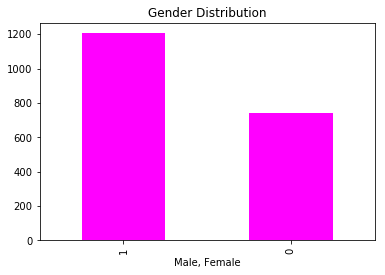

In [6]:
fig,axes = plt.subplots()
male = df_predictions["male"].value_counts()
male.plot(kind = "bar", colormap = "spring")
axes.set_xlabel("Male, Female")
plt.title("Gender Distribution")
plt.show()

Female popularity: 0.06075582576198653
Male propularity: 0.10731206372555807


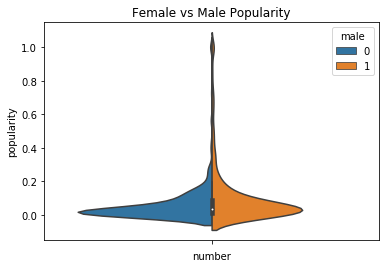

In [7]:
female = df_predictions[df_predictions["male"]==0]
female_popularity = female["popularity"].mean()
print("Female popularity:", female_popularity)
male_popularity = df_predictions[df_predictions["male"]==1].mean()
print("Male propularity:", male_popularity["popularity"])

df_predictions["number"] = 1
fig, axes = plt.subplots()
sns.violinplot(data = df_predictions, x = "number", y = "popularity", hue = "male", split = True, legend= False)
plt.title("Female vs Male Popularity")
axes.set_xticklabels([])
plt.show()

In [8]:
# ordinary least squares model as a precursor to the ANOVA
model_anova = ols('alive~C(popularity)', data = df_predictions).fit()

# calculate a type 2 two-way ANOVA
print("Predictor Variables: Popularity")
print("Dependent Variable: Alive")
aov_table = anova_lm(model_anova, typ = 2)
aov_table

Predictor Variables: Popularity
Dependent Variable: Alive


,sum_sq,df,F,PR(>F)
C(popularity),67.298484,165.0,5.911634,4.761371e-86
Residual,122.810012,1780.0,NaN,NaN


In [9]:
# ordinary least squares model as a precursor to the ANOVA
model_anova = ols('isAlive~C(popularity)', data = df_predictions).fit()

# calculate a type 2 two-way ANOVA
print("Predictor Variables: Popularity")
print("Dependent Variable: isAlive")
aov_table = anova_lm(model_anova, typ = 2)
aov_table

Predictor Variables: Popularity
Dependent Variable: isAlive


,sum_sq,df,F,PR(>F)
C(popularity),67.948705,165.0,2.434165,8.517942e-19
Residual,301.139167,1780.0,NaN,NaN


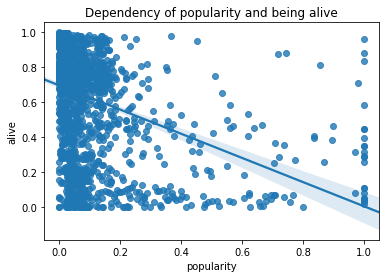

In [10]:
sns.regplot(data=df_predictions, x="popularity", y = "alive")
plt.title("Dependency of popularity and being alive")
plt.show()

In [11]:
df_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


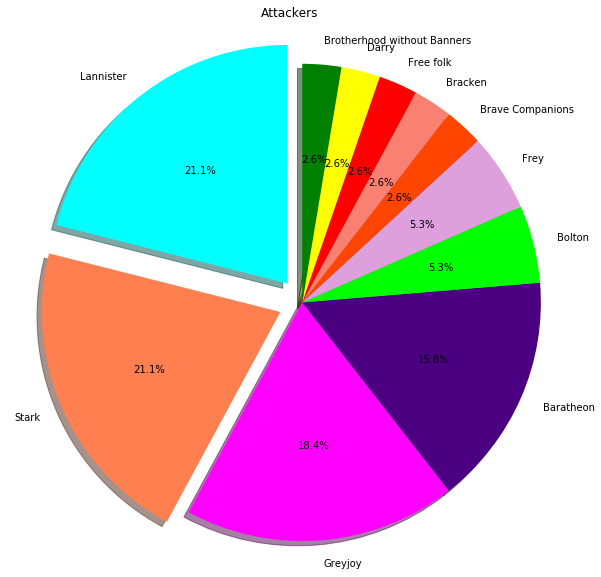

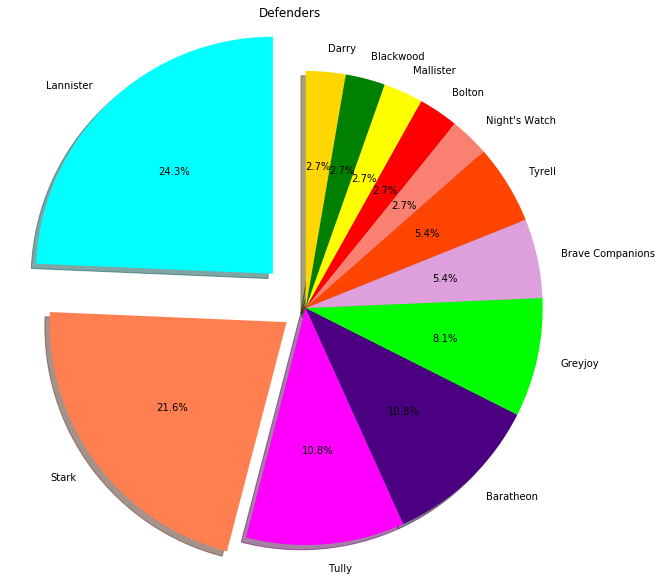

In [12]:
attackers = df_battles["attacker_1"].value_counts()
defenders = df_battles["defender_1"].value_counts()
explode1 = (0.1, 0.1, 0, 0,0,0,0,0,0,0,0)
colors1 = ["aqua", "coral", "fuchsia", "indigo", "lime", "plum", "orangered", "salmon", "red", "yellow", "green"] 
fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(attackers, explode = explode1, labels=attackers.index, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Attackers")

plt.show()
colors2 = ["aqua", "coral", "fuchsia", "indigo", "lime", "plum", "orangered", "salmon", "red", "yellow", "green","gold"] 
explode2 = (0.2, 0.1, 0, 0,0,0,0,0,0,0,0,0)
fig2, ax2 = plt.subplots(figsize = (10,10))
ax2.pie(defenders, explode = explode2, labels=defenders.index, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors2)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Defenders")
plt.show()